In [1]:
import torch
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pysr
import pickle

/Users/simon/mambaforge/lib/python3.10/site-packages/juliacall/__init__.py:60: UserWarning: torch was imported before juliacall. This may cause a segfault. To avoid this, import juliacall before importing torch. For updates, see https://github.com/pytorch/pytorch/issues/78829.
  warnings.warn(


Detected Jupyter notebook. Loading juliacall extension. Set `PYSR_AUTOLOAD_EXTENSIONS=no` to disable.


In [5]:
# version = 87804
# version = 72872
# version = 80525
# version = 15579
# version = 33060
version = 11003
results_path = f'sr_results/{version}.pkl'
reg = pickle.load(open(results_path, 'rb'))
assert len(reg.equations_) == 2
results = reg.equations_[0]  # equations for predicting the mean

In [6]:
# print the complexities for the mean
print(list(results['complexity']))

[1, 3, 4, 5, 7, 9, 11, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30]


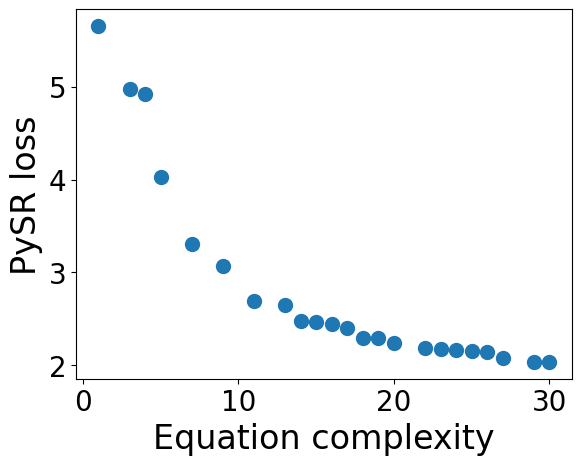

In [7]:
# plot the pareto curve for results
x = results['complexity']
y = results['loss']
# plot the pareto frontier
plt.scatter(x, y, s=100)
plt.xlabel('Equation complexity', fontsize=24)
plt.ylabel('PySR loss', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=20)
# plt.ylim(0, max(y)+1)
# plt.title(f'pareto frontier for {version}')
plt.savefig(f'pareto_{version}.png')
plt.show()



In [8]:
print(results)
# complexity 3, 5, 7, 9, 11, 14

    complexity      loss     score  \
0            1  5.653270  0.000000   
1            3  4.978444  0.063558   
2            4  4.918939  0.012024   
3            5  4.030765  0.199137   
4            7  3.305422  0.099196   
5            9  3.068312  0.037218   
6           11  2.696698  0.064550   
7           13  2.646566  0.009383   
8           14  2.478105  0.065769   
9           15  2.464568  0.005478   
10          16  2.448900  0.006378   
11          17  2.405428  0.017911   
12          18  2.297585  0.045869   
13          19  2.297566  0.000008   
14          20  2.237755  0.026377   
15          22  2.189967  0.010793   
16          23  2.180057  0.004535   
17          24  2.165426  0.006734   
18          25  2.153981  0.005300   
19          26  2.146375  0.003537   
20          27  2.082803  0.030066   
21          29  2.037085  0.011097   
22          30  2.036510  0.000282   

                                             equation  \
0                             

In [9]:
labels = ['time', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno', 'a1', 'e1', 'i1', 'cos_Omega1', 'sin_Omega1', 'cos_pomega1', 'sin_pomega1', 'cos_theta1', 'sin_theta1', 'a2', 'e2', 'i2', 'cos_Omega2', 'sin_Omega2', 'cos_pomega2', 'sin_pomega2', 'cos_theta2', 'sin_theta2', 'a3', 'e3', 'i3', 'cos_Omega3', 'sin_Omega3', 'cos_pomega3', 'sin_pomega3', 'cos_theta3', 'sin_theta3', 'm1', 'm2', 'm3', 'nan_mmr_near', 'nan_mmr_far', 'nan_megno']

# not all of these labels are actually used. for training, these inputs are zeroed out, but still passed in as zeroes.
# ideally, the linear layer ignores them, which does happen if i do l1 regularization to it
skipped = ['nan_mmr_near', 'nan_mmr_far', 'nan_megno', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno']

print(len(labels) - len(skipped))

31


In [10]:
# better_names = ['m_' + labels[i] for i in range(len(labels))] + ['s_' + labels[i] for i in range(len(labels))]

In [11]:
# for each equation in reg.equations_[0]['equation'], find and replace 'm{i}' with 'm_{labels[i]', and 's{i}' with 's_{labels[i]}'
# for eq_ix in range(len(results['equation'])):
#     for i in range(len(labels)):
#         results.at[eq_ix, 'equation'] = reg.equations_[0]['equation'][eq_ix].replace('m{}'.format(i), 'm_{}'.format(labels[i]))
#         results.at[eq_ix, 'equation'] = reg.equations_[0]['equation'][eq_ix].replace('s{}'.format(i), 's_{}'.format(labels[i]))

In [12]:
# dont print columns 'sympy_format' and 'lambda_format'
results.drop(columns=['sympy_format', 'lambda_format'])

,complexity,loss,score,equation
0,1,5.653270,0.000000,7.0051637
1,3,4.978444,0.063558,(6.990491 - m2)
2,4,4.918939,0.012024,(7.1660094 - sin(m2))
3,5,4.030765,0.199137,((s4 ^ -0.15489304) * 3.6422653)
4,7,3.305422,0.099196,(((s4 ^ -0.15921338) * 3.5656016) - m2)
5,9,3.068312,0.037218,((((s4 * s1) ^ -0.15921338) + 3.5656016) - m2)
6,11,2.696698,0.064550,((((s4 ^ -0.30986544) - m2) * (0.14308752 ^ s1...
7,13,2.646566,0.009383,(((((s4 ^ -0.31699488) - s6) - m2) * (0.160041...
8,14,2.478105,0.065769,((((s4 ^ -0.32957777) - (sin(m2) - m7)) * (0.0...
9,15,2.464568,0.005478,((((s4 ^ -0.32764328) - ((m2 - m7) / 1.4952106...


In [13]:
for i in range(len(results)):
    print(i, results['equation'][i])

0 7.0051637
1 (6.990491 - m2)
2 (7.1660094 - sin(m2))
3 ((s4 ^ -0.15489304) * 3.6422653)
4 (((s4 ^ -0.15921338) * 3.5656016) - m2)
5 ((((s4 * s1) ^ -0.15921338) + 3.5656016) - m2)
6 ((((s4 ^ -0.30986544) - m2) * (0.14308752 ^ s1)) + 3.6591659)
7 (((((s4 ^ -0.31699488) - s6) - m2) * (0.16004194 ^ s1)) + 3.6591659)
8 ((((s4 ^ -0.32957777) - (sin(m2) - m7)) * (0.058552526 ^ s1)) + 3.6591659)
9 ((((s4 ^ -0.32764328) - ((m2 - m7) / 1.4952106)) * (0.08607817 ^ s1)) + 3.5478935)
10 ((((s4 ^ -0.32957777) - (sin(m2) - m7)) * ((0.058552526 ^ s1) - s2)) + 3.6591659)
11 ((((s4 ^ -0.32764328) - ((m2 - (m7 - s6)) / 1.4952106)) * (0.0841594 ^ s1)) + 3.6591659)
12 ((((((s4 * (s6 ^ 0.21691035)) ^ -0.3054036) + m7) - sin(m2)) * (0.058552526 ^ s1)) + 3.5478935)
13 ((((((s4 * (s6 ^ 0.21691035)) ^ -0.3054036) + m7) - sin(m2)) * (sin(0.058552526) ^ s1)) + 3.5478935)
14 ((((((s4 * (s6 ^ 0.22899987)) ^ -0.3054036) + (m7 - s8)) - sin(m2)) * (0.058552526 ^ s1)) + 3.6591659)
15 (((((((s4 + s2) * (s6 ^ 0.35097006

AttributeError: 'DataFrame' object has no attribute 'latex'

In [29]:
print(reg.latex_table(precision=2, indices=[[1, 3, 5, 7, 9, 11, 13, 14, 18, 20, 27, 29], [ 1, 3, 5, 7, 9, 11, 13, 14, 18, 20, 27, 29], columns=['equation', 'complexity', 'loss']))

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1264618757.py, line 1)

In [23]:
def fix_feature_name(s):
    # replace m with \mu and s with \sigma

array(['m0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 's0',
       's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9'], dtype=object)